In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

# Featurization of textual data
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Pretrained word2vec models
from gensim.models import Word2Vec,KeyedVectors
import spacy

# tqdm is used to print the progrss bar
from tqdm import tqdm

# Model training and selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb

# Performance metrics
from sklearn.metrics import log_loss,confusion_matrix

stop_words = ["able","about","above","abroad","according","accordingly","across","actually","adj","after","afterwards","again","against","ago","ahead","ain't","all","allow","allows","almost","alone","along","alongside","already","also","although","always","am","amid","amidst","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","a's","aside","ask","asking","associated","at","available","away","awfully","back","backward","backwards","be","became","because","become","becomes","becoming","been","before","beforehand","begin","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","came","can","cannot","cant","can't","caption","cause","causes","certain","certainly","changes","clearly","c'mon","co","co.","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","c's","currently","dare","daren't","definitely","described","despite","did","didn't","different","directly","do","does","doesn't","doing","done","don't","down","downwards","during","each","edu","eg","eight","eighty","either","else","elsewhere","end","ending","enough","entirely","especially","et","etc","even","ever","evermore","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","fairly","far","farther","few","fewer","fifth","first","five","followed","following","follows","for","forever","former","formerly","forth","forward","found","four","from","further","furthermore","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","had","hadn't","half","happens","hardly","has","hasn't","have","haven't","having","he","he'd","he'll","hello","help","hence","her","here","hereafter","hereby","herein","here's","hereupon","hers","herself","he's","hi","him","himself","his","hither","hopefully","how","howbeit","however","hundred","i'd","ie","if","ignored","i'll","i'm","immediate","in","inasmuch","inc","inc.","indeed","indicate","indicated","indicates","inner","inside","insofar","instead","into","inward","is","isn't","it","it'd","it'll","its","it's","itself","i've","just","k","keep","keeps","kept","know","known","knows","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","likewise","little","look","looking","looks","low","lower","ltd","made","mainly","make","makes","many","may","maybe","mayn't","me","mean","meantime","meanwhile","merely","might","mightn't","mine","minus","miss","more","moreover","most","mostly","mr","mrs","much","must","mustn't","my","myself","name","namely","nd","near","nearly","necessary","need","needn't","needs","neither","never","neverf","neverless","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","no-one","nor","normally","not","nothing","notwithstanding","novel","now","nowhere","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","one's","only","onto","opposite","or","other","others","otherwise","ought","oughtn't","our","ours","ourselves","out","outside","over","overall","own","particular","particularly","past","per","perhaps","placed","please","plus","possible","presumably","probably","provided","provides","que","quite","qv","rather","rd","re","really","reasonably","recent","recently","regarding","regardless","regards","relatively","respectively","right","round","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","shan't","she","she'd","she'll","she's","should","shouldn't","since","six","so","some","somebody","someday","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","that'll","thats","that's","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","there'd","therefore","therein","there'll","there're","theres","there's","thereupon","there've","these","they","they'd","they'll","they're","they've","thing","things","think","third","thirty","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","till","to","together","too","took","toward","towards","tried","tries","truly","try","trying","t's","twice","two","un","under","underneath","undoing","unfortunately","unless","unlike","unlikely","until","unto","up","upon","upwards","us","use","used","useful","uses","using","usually","v","value","various","versus","very","via","viz","vs","want","wants","was","wasn't","way","we","we'd","welcome","well","we'll","went","were","we're","weren't","we've","what","whatever","what'll","what's","what've","when","whence","whenever","where","whereafter","whereas","whereby","wherein","where's","whereupon","wherever","whether","which","whichever","while","whilst","whither","who","who'd","whoever","whole","who'll","whom","whomever","who's","whose","why","will","willing","wish","with","within","without","wonder","won't","would","wouldn't","yes","yet","you","you'd","you'll","your","you're","yours","yourself","yourselves","you've","zero","a","how's","i","when's","why's","b","c","d","e","f","g","h","j","l","m","n","o","p","q","r","s","t","u","uucp","w","x","y","z","I","www","amount","bill","bottom","call","computer","con","couldnt","cry","de","describe","detail","due","eleven","empty","fifteen","fifty","fill","find","fire","forty","front","full","give","hasnt","herse","himse","interest","itse”","mill","move","myse”","part","put","show","side","sincere","sixty","system","ten","thick","thin","top","twelve","twenty","abst","accordance","act","added","adopted","affected","affecting","affects","ah","announce","anymore","apparently","approximately","aren","arent","arise","auth","beginning","beginnings","begins","biol","briefly","ca","date","ed","effect","et-al","ff","fix","gave","giving","heres","hes","hid","home","id","im","immediately","importance","important","index","information","invention","itd","keys","kg","km","largely","lets","line","'ll","means","mg","million","ml","mug","na","nay","necessarily","nos","noted","obtain","obtained","omitted","ord","owing","page","pages","poorly","possibly","potentially","pp","predominantly","present","previously","primarily","promptly","proud","quickly","ran","readily","ref","refs","related","research","resulted","resulting","results","run","sec","section","shed","shes","showed","shown","showns","shows","significant","significantly","similar","similarly","slightly","somethan","specifically","state","states","stop","strongly","substantially","successfully","sufficiently","suggest","thered","thereof","therere","thereto","theyd","theyre","thou","thoughh","thousand","throug","til","tip","ts","ups","usefully","usefulness","'ve","vol","vols","wed","whats","wheres","whim","whod","whos","widely","words","world","youd","youre"]

In [126]:
df = pd.read_csv("train.csv")

In [127]:
# Duplicate Questions

for i in range(5):
    print(df[df["is_duplicate"]==1].iloc[i].question1)
    print(df[df["is_duplicate"]==1].iloc[i].question2)
    print("-------------------------------------------")

Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?
-------------------------------------------
How can I be a good geologist?
What should I do to be a great geologist?
-------------------------------------------
How do I read and find my YouTube comments?
How can I see all my Youtube comments?
-------------------------------------------
What can make Physics easy to learn?
How can you make physics easy to learn?
-------------------------------------------
What was your first sexual experience like?
What was your first sexual experience?
-------------------------------------------


In [128]:
# non-Duplicate Questions

for i in range(5):
    print(df[df["is_duplicate"]==0].iloc[i].question1)
    print(df[df["is_duplicate"]==0].iloc[i].question2)
    print("-------------------------------------------")

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?
-------------------------------------------
What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?
-------------------------------------------
How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?
-------------------------------------------
Why am I mentally very lonely? How can I solve it?
Find the remainder when [math]23^{24}[/math] is divided by 24,23?
-------------------------------------------
Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Which fish would survive in salt water?
-------------------------------------------


In [129]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [130]:
df.groupby("is_duplicate").count().drop(["qid1","qid2","question1","question2"],axis=1)

,id
is_duplicate,
0,255027
1,149263


In [131]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


<h1> Preprocessing </h1>

In [51]:
#Stemming 

ps = PorterStemmer()
for word in (df.iloc[0].question1).split(' '):
    print(ps.stem(word))

what
is
the
step
by
step
guid
to
invest
in
share
market
in
india?


In [55]:
#Remove N/As

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [132]:
df = df.dropna()

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


<h1> EDA </h1>

In [11]:
len(list(df.question1)+(list(df.question2)))

808574

In [12]:
len(set(list(df.question1)+(list(df.question2))))

537359

<h1> Basic Feature Extraction </h1>

In [134]:
q_dict = {}
q_unique = set(list(df.question1)+(list(df.question2)))
q_total = list(df.question1)+(list(df.question2))
for q in q_total:
    if (q in q_dict) : q_dict[q] += 1
    else : q_dict[q] = 1

In [135]:
df_size = len(df)
df['freq1'] = [ q_dict[df['question1'].iloc[i]] for i in range(df_size)]
df['freq2'] = [ q_dict[df['question2'].iloc[i]] for i in range(df_size)]
df['q1len'] = df['question1'].str.len()
df['q2len'] = df['question2'].str.len()
df['q1words'] = [len(df['question1'].iloc[i].split(' ')) for i in range(df_size)]
df['q2words'] = [len(df['question2'].iloc[i].split(' ')) for i in range(df_size)]
df['word_common'] = [len(set(df['question1'].iloc[i].split(' ')).intersection(set(df['question2'].iloc[i].split(' ')))) for i in range(df_size)]
df['word_total'] = df['q1words'] + df['q2words']
df['word_share'] = df['word_common']/df['word_total']
df['freq1+freq2'] = df['freq1'] + df['freq2']
df['freq1-freq2'] = abs(df['freq1'] - df['freq2'])

In [136]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq1,freq2,q1len,q2len,q1words,q2words,word_common,word_total,word_share,freq1+freq2,freq1-freq2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,26,0.384615,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,2,51,88,8,13,4,21,0.190476,6,2
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,3,24,0.125000,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,20,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,20,0.100000,4,2


<AxesSubplot:xlabel='word_share', ylabel='Count'>

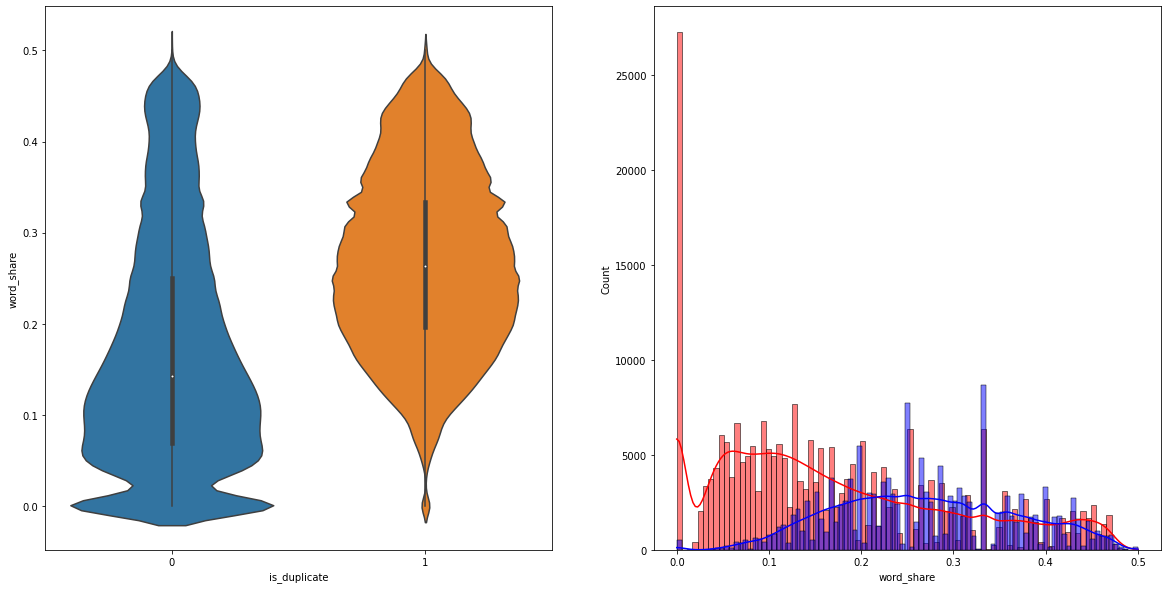

In [137]:
# Feature : word_share

plt.figure(figsize=(20,10))

plt.subplot(121)
sns.violinplot(data=df,x='is_duplicate',y='word_share')

plt.subplot(122)
sns.histplot(df[df['is_duplicate']==0]['word_share'],color='r',kde=1)
sns.histplot(df[df['is_duplicate']==1]['word_share'],color='b',kde=1)

<AxesSubplot:xlabel='word_common', ylabel='Count'>

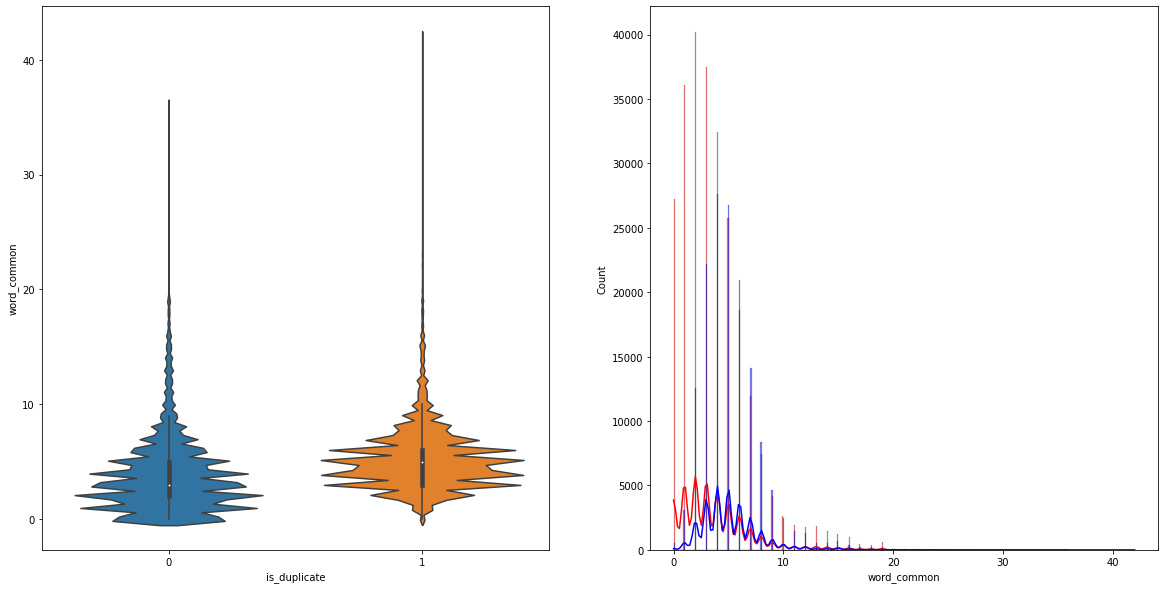

In [138]:
# Feature : word_common

plt.figure(figsize=(20,10))

plt.subplot(121)
sns.violinplot(data=df,x='is_duplicate',y='word_common')

plt.subplot(122)
sns.histplot(df[df['is_duplicate']==0]['word_common'],color='r',kde=1)
sns.histplot(df[df['is_duplicate']==1]['word_common'],color='b',kde=1)

<h1> Preprocessing </h1>

In [139]:
def remove_tags(text):
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub('', text)

def remove_punctuations(text):
    return " ".join(re.split('\W+', text))

def remove_stopwords(text):
    stopwords_dict = Counter(stop_words)
    return ' '.join([word for word in text.split() if word not in stopwords_dict])

def remove_num(text):
    return re.sub(r'\b\d+(?:\.\d+)?\s+', '', text)

def stem_text(text):
    p = PorterStemmer()
    return " ".join([ p.stem(word)for word in text.split(' ')])

In [140]:
df['question1_temp'] = list(map(remove_tags,df['question1']))
df['question1_temp'] = list(map(remove_punctuations,df['question1_temp']))
df['question1_temp'] = list(map(remove_num,df['question1_temp']))
df['question1_temp'] = list(map(remove_stopwords,df['question1_temp']))


df['question2_temp'] = list(map(remove_tags,df['question2']))
df['question2_temp'] = list(map(remove_punctuations,df['question2_temp']))
df['question2_temp'] = list(map(remove_num,df['question2_temp']))
df['question2_temp'] = list(map(remove_stopwords,df['question2_temp']))

In [50]:
# Stemming avoided for Word2Vec transformation.

# df['question1_temp'] = list(map(stem_text,df['question1_temp']))
# df['question2_temp'] = list(map(stem_text,df['question2_temp']))

In [141]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq1,freq2,q1len,q2len,q1words,q2words,word_common,word_total,word_share,freq1+freq2,freq1-freq2,question1_temp,question2_temp
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,26,0.384615,2,0,What step step guide invest share market india,What step step guide invest share market
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,2,51,88,8,13,4,21,0.190476,6,2,What story Kohinoor Koh Noor Diamond,What happen Indian government stole Kohinoor K...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,3,24,0.125000,2,0,How increase speed internet connection VPN,How Internet speed increased hacking DNS
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,20,0.000000,2,0,Why mentally lonely How solve,Find remainder math math divided
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,20,0.100000,4,2,Which dissolve water quikly sugar salt methane...,Which fish survive salt water


In [146]:
# It is possible that after preprocessing of text, whole questions could have been deleted, which can lead to an exmpty field.
# This part of code aims to drop such rows

rows_to_purge1 = [i for i in range(len(df)) if(len(df['question1_temp'].iloc[i])==0)]
rows_to_purge2 = [i for i in range(len(df)) if(len(df['question2_temp'].iloc[i])==0)]
rows_to_purge = rows_to_purge1 + rows_to_purge2
df.drop(rows_to_purge)
df.head()

[]
Total 0 rows to purge


,id,qid1,qid2,question1,question2,is_duplicate,freq1,freq2,q1len,q2len,q1words,q2words,word_common,word_total,word_share,freq1+freq2,freq1-freq2,question1_temp,question2_temp
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,26,0.384615,2,0,What step step guide invest share market india,What step step guide invest share market
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,2,51,88,8,13,4,21,0.190476,6,2,What story Kohinoor Koh Noor Diamond,What happen Indian government stole Kohinoor K...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,3,24,0.125000,2,0,How increase speed internet connection VPN,How Internet speed increased hacking DNS
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,20,0.000000,2,0,Why mentally lonely How solve,Find remainder math math divided
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,20,0.100000,4,2,Which dissolve water quikly sugar salt methane...,Which fish survive salt water


<h1> Word2Vec </h1>

In [71]:
# Using Google's pretrained model for word2vec transformation, trained on GoogleNews.
# Downloaded from :  https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

model1 = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

In [72]:
# As the model has been loaded, it can be used to derive a vector for any word

print(model1['word'])
print(model1['word'].shape)

[ 3.59375000e-01  4.15039062e-02  9.03320312e-02  5.46875000e-02
 -1.47460938e-01  4.76074219e-02 -8.49609375e-02 -2.04101562e-01
  3.10546875e-01 -1.05590820e-02 -6.15234375e-02 -1.55273438e-01
 -1.52343750e-01  8.54492188e-02 -2.70996094e-02  3.84765625e-01
  4.78515625e-02  2.58789062e-02  4.49218750e-02 -2.79296875e-01
  9.09423828e-03  4.08203125e-01  2.40234375e-01 -3.06640625e-01
 -1.80664062e-01  4.73632812e-02 -2.63671875e-01  9.08203125e-02
  1.37695312e-01 -7.20977783e-04  2.67333984e-02  1.92382812e-01
 -2.29492188e-02  9.70458984e-03 -7.37304688e-02  4.29687500e-01
 -7.93457031e-03  1.06445312e-01  2.80761719e-02 -2.29492188e-01
 -1.91650391e-02 -2.36816406e-02  3.51562500e-02  1.71875000e-01
 -1.12304688e-01  6.25000000e-02 -1.69921875e-01  1.29882812e-01
 -1.54296875e-01  1.58203125e-01 -7.76367188e-02  1.78710938e-01
 -1.72851562e-01  9.96093750e-02  3.94531250e-01  6.44531250e-02
 -6.83593750e-02 -3.18359375e-01  5.95703125e-02 -1.02539062e-02
  9.37500000e-02  8.25195

In [73]:
# This library comes equipped with a lot of helpful methods such as : 
# Method to find similarity between 2 words, 0 being the lowest and 1 being the highest

model1.similarity('trainer','trainee')

0.44129065

In [74]:
# Method to find similar words for a given word 

model1.most_similar('why')

[('created_Benzinga_Pro', 0.6171942949295044),
 ('reason', 0.6132422089576721),
 ('what', 0.5964176058769226),
 ('how', 0.5838740468025208),
 ('Why', 0.5821189284324646),
 ('exactly', 0.5554826855659485),
 ('so', 0.5248562693595886),
 ('if', 0.5216920971870422),
 ('anyway', 0.5190824866294861),
 ('why_Mee_hiccuped', 0.515602707862854)]

In [76]:
# Another Model : spacy, trained on wikipedia.

model2 = spacy.load("en_core_web_sm")

In [1]:
# Feature extraction will be done by weighted tfidf word2vec transformation

questions = list(df['question1_temp']) + list(df['question2_temp'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [99]:
model2('training').vector

array([ 1.1339535 ,  0.1569789 , -0.8082445 ,  0.25555328,  0.19981867,
        0.02758306,  0.84028304, -0.8228782 , -0.18703943, -0.95979106,
       -0.03577709, -0.89222723,  1.869693  ,  0.5521141 , -1.1000943 ,
       -0.6089711 ,  0.36795035, -0.34428415, -0.74453443, -0.7121215 ,
        1.5739634 , -1.0457938 , -0.518567  ,  0.22811824,  0.45820135,
        1.1991563 , -0.02085769, -0.9709254 ,  0.7958629 , -0.59338534,
        0.45800313,  0.18739611, -1.2975049 ,  0.46263185, -0.44352898,
        1.0083128 , -0.89472705,  0.2517689 ,  0.15762636, -0.77941465,
        1.5786283 ,  3.1377115 ,  0.2579903 , -0.50752175, -0.170407  ,
       -0.81700265, -0.57075864,  0.06252679,  0.10978413,  0.43875688,
        0.2959878 , -0.31071538, -1.8336394 , -2.3834896 ,  2.0868027 ,
        0.41871712, -1.2850218 , -0.50409144,  0.20665567, -0.72648346,
        0.2915032 , -1.3380291 ,  0.5604544 , -0.49217114, -0.50448066,
        0.13737398, -0.1314199 ,  0.47940946, -0.7343805 , -1.37

In [2]:
# Model2 has been found to be better transformer due to being trained on a more relevant data.

vecs1 = []


for qu1 in tqdm(list(df['question1_temp'])):
    doc1 = model2(qu1) 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        vec1 = word1.vector
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['q1_feats_m'] = list(vecs1)


In [149]:
vecs2 = []
for qu2 in tqdm(list(df['question2_temp'])):
    doc2 = model2(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        vec2 = word2.vector
        try:
            idf = word2tfidf[str(word2)]
        except:
            idf = 0
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
df['q2_feats_m'] = list(vecs2)

100%|█████████████████████████████████████████████████████████████████████████| 404233/404233 [25:13<00:00, 267.07it/s]


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404233 entries, 0 to 404289
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              404233 non-null  int64  
 1   qid1            404233 non-null  int64  
 2   qid2            404233 non-null  int64  
 3   question1       404233 non-null  object 
 4   question2       404233 non-null  object 
 5   is_duplicate    404233 non-null  int64  
 6   freq1           404233 non-null  int64  
 7   freq2           404233 non-null  int64  
 8   q1len           404233 non-null  int64  
 9   q2len           404233 non-null  int64  
 10  q1words         404233 non-null  int64  
 11  q2words         404233 non-null  int64  
 12  word_common     404233 non-null  int64  
 13  word_total      404233 non-null  int64  
 14  word_share      404233 non-null  float64
 15  freq1+freq2     404233 non-null  int64  
 16  freq1-freq2     404233 non-null  int64  
 17  question1_

In [153]:
len(df.q1_feats_m.iloc[1])

96

In [154]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq1,freq2,q1len,q2len,...,q2words,word_common,word_total,word_share,freq1+freq2,freq1-freq2,question1_temp,question2_temp,q1_feats_m,q2_feats_m
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,...,12,10,26,0.384615,2,0,What step step guide invest share market india,What step step guide invest share market,"[64.84319043159485, -11.860529258847237, 4.513...","[51.613716661930084, -5.204928874969482, -0.02..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,2,51,88,...,13,4,21,0.190476,6,2,What story Kohinoor Koh Noor Diamond,What happen Indian government stole Kohinoor K...,"[117.25680597871542, -22.13636088371277, -19.7...","[99.43079364299774, 15.094678122550249, -21.97..."
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,...,10,3,24,0.125000,2,0,How increase speed internet connection VPN,How Internet speed increased hacking DNS,"[40.450236320495605, -28.326040387153625, -21....","[5.747204840183258, 7.535231828689575, 7.44025..."
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,...,9,0,20,0.000000,2,0,Why mentally lonely How solve,Find remainder math math divided,"[19.625163316726685, 43.945729076862335, -3.37...","[21.524843245744705, 30.142037630081177, -15.9..."
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,...,7,2,20,0.100000,4,2,Which dissolve water quikly sugar salt methane...,Which fish survive salt water,"[76.55339026451111, -28.713017404079437, -7.53...","[36.958484411239624, -21.09690511226654, 0.185..."


In [158]:
df.drop(['qid1','qid2'],axis=1,inplace=True)
df_copy = df
df_new = df_copy
df.drop(['question1','question2','question1_temp','question2_temp'],axis=1,inplace=True)

In [163]:
df.head()

,id,is_duplicate,freq1,freq2,q1len,q2len,q1words,q2words,word_common,word_total,word_share,freq1+freq2,freq1-freq2,q1_feats_m,q2_feats_m
0,0,0,1,1,66,57,14,12,10,26,0.384615,2,0,"[64.84319043159485, -11.860529258847237, 4.513...","[51.613716661930084, -5.204928874969482, -0.02..."
1,1,0,4,2,51,88,8,13,4,21,0.190476,6,2,"[117.25680597871542, -22.13636088371277, -19.7...","[99.43079364299774, 15.094678122550249, -21.97..."
2,2,0,1,1,73,59,14,10,3,24,0.125000,2,0,"[40.450236320495605, -28.326040387153625, -21....","[5.747204840183258, 7.535231828689575, 7.44025..."
3,3,0,1,1,50,65,11,9,0,20,0.000000,2,0,"[19.625163316726685, 43.945729076862335, -3.37...","[21.524843245744705, 30.142037630081177, -15.9..."
4,4,0,3,1,76,39,13,7,2,20,0.100000,4,2,"[76.55339026451111, -28.713017404079437, -7.53...","[36.958484411239624, -21.09690511226654, 0.185..."


In [178]:
# Vectors as features

dfq1 = pd.DataFrame(df_new.q1_feats_m.values.tolist(), index= df_new.index)
dfq2 = pd.DataFrame(df_new.q2_feats_m.values.tolist(), index= df_new.index)
df_new = pd.concat([dfq1,dfq2],axis=1)

In [217]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,q2len,q1words,q2words,word_common,word_total,word_share,freq1+freq2,freq1-freq2,q1_feats_m,q2_feats_m
0,64.843190,-11.860529,4.513413,-22.685278,27.794880,17.556912,-1.533846,-15.573619,24.197574,-22.442593,...,57,14,12,10,26,0.384615,2,0,"[64.84319043159485, -11.860529258847237, 4.513...","[51.613716661930084, -5.204928874969482, -0.02..."
1,117.256806,-22.136361,-19.776595,-35.960741,4.207618,19.217306,-55.628834,37.135288,29.152763,-21.343656,...,88,8,13,4,21,0.190476,6,2,"[117.25680597871542, -22.13636088371277, -19.7...","[99.43079364299774, 15.094678122550249, -21.97..."
2,40.450236,-28.326040,-21.717337,-10.255273,8.834429,17.050354,-1.758302,-12.559926,34.337263,0.657651,...,59,14,10,3,24,0.125000,2,0,"[40.450236320495605, -28.326040387153625, -21....","[5.747204840183258, 7.535231828689575, 7.44025..."
3,19.625163,43.945729,-3.377623,11.820668,0.257381,-4.736321,0.097059,-0.924608,23.862806,-23.220753,...,65,11,9,0,20,0.000000,2,0,"[19.625163316726685, 43.945729076862335, -3.37...","[21.524843245744705, 30.142037630081177, -15.9..."
4,76.553390,-28.713017,-7.532252,-25.881171,41.402173,43.458802,-11.009650,-56.985737,73.043534,-0.280859,...,39,13,7,2,20,0.100000,4,2,"[76.55339026451111, -28.713017404079437, -7.53...","[36.958484411239624, -21.09690511226654, 0.185..."


In [218]:
df_new.drop(['q1_feats_m','q2_feats_m'],axis=1,inplace=True)

In [219]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,freq2,q1len,q2len,q1words,q2words,word_common,word_total,word_share,freq1+freq2,freq1-freq2
0,64.843190,-11.860529,4.513413,-22.685278,27.794880,17.556912,-1.533846,-15.573619,24.197574,-22.442593,...,1,66,57,14,12,10,26,0.384615,2,0
1,117.256806,-22.136361,-19.776595,-35.960741,4.207618,19.217306,-55.628834,37.135288,29.152763,-21.343656,...,2,51,88,8,13,4,21,0.190476,6,2
2,40.450236,-28.326040,-21.717337,-10.255273,8.834429,17.050354,-1.758302,-12.559926,34.337263,0.657651,...,1,73,59,14,10,3,24,0.125000,2,0
3,19.625163,43.945729,-3.377623,11.820668,0.257381,-4.736321,0.097059,-0.924608,23.862806,-23.220753,...,1,50,65,11,9,0,20,0.000000,2,0
4,76.553390,-28.713017,-7.532252,-25.881171,41.402173,43.458802,-11.009650,-56.985737,73.043534,-0.280859,...,1,76,39,13,7,2,20,0.100000,4,2


In [220]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404233 entries, 0 to 404289
Columns: 205 entries, 0 to freq1-freq2
dtypes: float64(193), int64(12)
memory usage: 651.4 MB


In [221]:
y = df_new.is_duplicate

In [222]:
X = df_new.drop(['is_duplicate'],axis=1)

In [223]:
X

,0,1,2,3,4,5,6,7,8,9,...,freq2,q1len,q2len,q1words,q2words,word_common,word_total,word_share,freq1+freq2,freq1-freq2
0,64.843190,-11.860529,4.513413,-22.685278,27.794880,17.556912,-1.533846,-15.573619,24.197574,-22.442593,...,1,66,57,14,12,10,26,0.384615,2,0
1,117.256806,-22.136361,-19.776595,-35.960741,4.207618,19.217306,-55.628834,37.135288,29.152763,-21.343656,...,2,51,88,8,13,4,21,0.190476,6,2
2,40.450236,-28.326040,-21.717337,-10.255273,8.834429,17.050354,-1.758302,-12.559926,34.337263,0.657651,...,1,73,59,14,10,3,24,0.125000,2,0
3,19.625163,43.945729,-3.377623,11.820668,0.257381,-4.736321,0.097059,-0.924608,23.862806,-23.220753,...,1,50,65,11,9,0,20,0.000000,2,0
4,76.553390,-28.713017,-7.532252,-25.881171,41.402173,43.458802,-11.009650,-56.985737,73.043534,-0.280859,...,1,76,39,13,7,2,20,0.100000,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,29.301984,-10.528457,-16.233197,-11.878228,-9.733045,-9.576056,20.171603,-13.262112,28.945733,12.369874,...,2,85,79,14,13,9,27,0.333333,4,0
404286,5.975585,-13.955633,-1.626589,-1.544020,5.535279,23.739225,9.150380,-11.557606,10.662218,0.435997,...,12,41,42,8,9,5,17,0.294118,24,0
404287,21.003238,-0.133209,-5.256064,-6.899177,3.901298,8.261348,-4.948437,-6.351830,13.153244,-6.870792,...,1,17,17,4,3,1,7,0.142857,2,0
404288,44.915212,-26.353923,-26.004226,17.413444,0.467863,-5.949048,-13.750571,-19.553379,45.371081,-5.010322,...,1,94,127,17,25,1,42,0.023810,2,0


In [229]:
y

0         0
1         0
2         0
3         0
4         0
         ..
404285    0
404286    1
404287    0
404288    0
404289    0
Name: is_duplicate, Length: 404233, dtype: int64

In [230]:
# Making space.

del model1
del model2
del df_new
del dfq1
del dfq2

<h1> Training the model </h1>

In [3]:
n = Normalizer()
X = n.fit_transform(X)

In [233]:
X.shape

(404233, 204)

In [234]:
y.shape

(404233,)

In [239]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
del X
del y

<h1> Random Model </h1>

In [280]:
y_pred = np.random.randint(0,2,len(y_test))

In [281]:
log_loss(y_test,y_pred,eps=1e-15)

17.225381053528075

<AxesSubplot:>

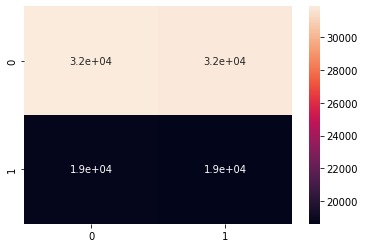

In [270]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [273]:
confusion_matrix(y_test,y_pred)

array([[31896, 31798],
       [18754, 18611]], dtype=int64)

<h1> Logistic Regression </h1>

In [289]:
alpha = [10 ** x for x in range(-7, 2)] 


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of alpha =  1e-07 The log loss is: 0.6519436734171886
For values of alpha =  1e-06 The log loss is: 0.6525187646853536
For values of alpha =  1e-05 The log loss is: 0.6564804648525969
For values of alpha =  0.0001 The log loss is: 0.6578056420047866
For values of alpha =  0.001 The log loss is: 0.658328592673733
For values of alpha =  0.01 The log loss is: 0.6583581500285131
For values of alpha =  0.1 The log loss is: 0.6584436471010602
For values of alpha =  1 The log loss is: 0.6588077578854651
For values of alpha =  10 The log loss is: 0.6588043185089345


<h1> LinearSVM </h1>

In [ ]:
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of alpha =  1e-07 The log loss is: 0.652663457337191
For values of alpha =  1e-06 The log loss is: 0.6525197945141812


<h1> XGBoost </h1>

In [296]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 600, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.68632	valid-logloss:0.68635
[10]	train-logloss:0.62970	valid-logloss:0.63010
[20]	train-logloss:0.58878	valid-logloss:0.58958
[30]	train-logloss:0.55782	valid-logloss:0.55894
[40]	train-logloss:0.53414	valid-logloss:0.53554
[50]	train-logloss:0.51527	valid-logloss:0.51690
[60]	train-logloss:0.50047	valid-logloss:0.50229
[70]	train-logloss:0.48789	valid-logloss:0.48989
[80]	train-logloss:0.47803	valid-logloss:0.48024
[90]	train-logloss:0.46988	valid-logloss:0.47222
[100]	train-logloss:0.46253	valid-logloss:0.46502
[110]	train-logloss:0.45667	valid-logloss:0.45928
[120]	train-logloss:0.45142	valid-logloss:0.45411
[130]	train-logloss:0.44677	valid-logloss:0.44959
[140]	train-logloss:0.44260	valid-logloss:0.44551
[150]	train-logloss:0.43908	valid-logloss:0.44209
[160]	train-logloss:0.43551	valid-logloss:0.43866
[170]	train-logloss:0.43220	valid-logloss:0.43545
[180]	train-logloss:0.42915	valid-logloss:0.43246
[190]	train-logloss:0.42575	valid-logloss:0.42915
[200]	train